In [1]:
#Install Dependencies

In [2]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

In [1]:
#import standard dependecies
import cv2 #open cv
import os 
import random
import numpy as np
from matplotlib import pyplot as plt

In [4]:
plt.imshow??

In [2]:
#import tensorflow dependecies - functional apis
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf 

In [6]:
#Model(inputs=[inputimage, verificationImage] , outputs=[1,0]) 

In [7]:
#class L1Dist(Layer)

In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [9]:
#Create folder structure
#input image= anchor image
#verification image= positive image
#all other images=negative image
#we will have 3 types images : 1.(input image) anchor ie the image to be tested 2. we will send the positive image i.e the verification image
#3. is the negative image i.e the negative example to be checked with our input image


In [3]:
#setup paths
#BASICALLY WE ARE CREATING ONE BIG FOLDER DATA WHICH HAS 3 DIRECTORIES AS POSITIVE NEGATIVE AND ANCHOR
POS_PATH =r"C:\Users\Asus\machine learning\data\positive" #os.path.join -> joins diffn directories together
NEG_PATH =r"C:\Users\Asus\machine learning\data\negative"
ANC_PATH =r"C:\Users\Asus\machine learning\data\anchor"
                       

In [4]:
POS_PATH

'C:\\Users\\Asus\\machine learning\\data\\positive'

In [5]:
#Make the directories
#os.makedirs(POS_PATH)# makedirs will create the full file path
#os.makedirs(NEG_PATH)
#os.makedirs(ANC_PATH)

# directories already created

# Collect Positives and Anchors

## Our Model in a Nutshell

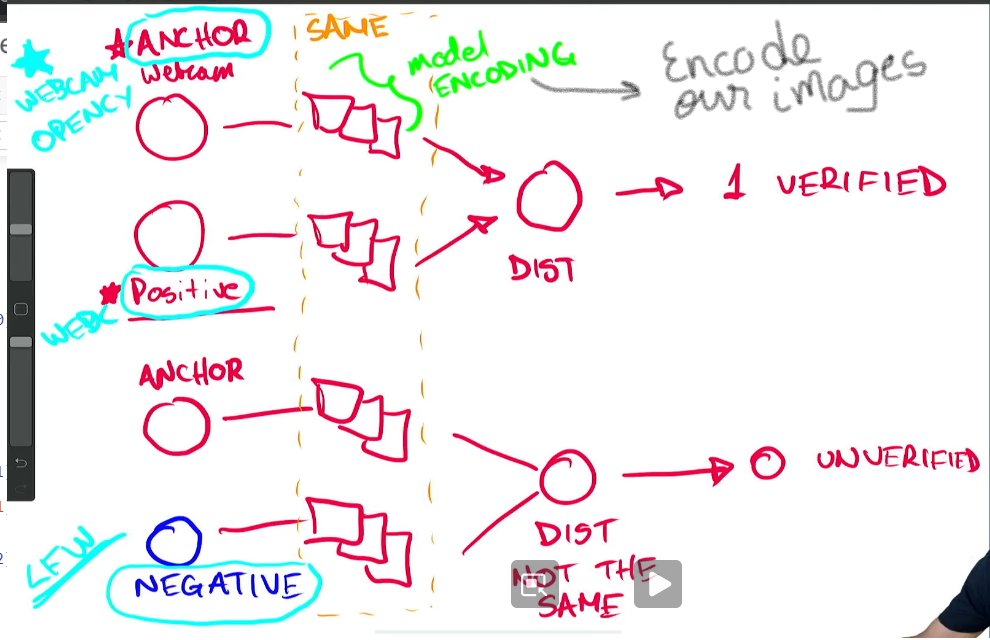

## untar labelled faces in the wild dataset

In [15]:
# http://vis-www.cs.umass.edu/lfw/

In [16]:
# Move lfw images to the following repository data/negative
for directory in os.listdir('lfw'):   # we are looping through all the folders(i.e persons) in our lfw directory/folder 
    for file in os.listdir(os.path.join('lfw',directory)): # now we are looping through every single file inside that directory (all photos)
        EX_PATH = os.path.join('lfw',directory,file) # this will give path of the original location of a photo
        NEW_PATH = os.path.join(NEG_PATH,file) #join our negative path with file name
        os.replace(EX_PATH,NEW_PATH)#grab the photo from its existing path and paste it into new path
        

## Collect positive and anchor classes

In [5]:
#import uuid library to generate unique image  names
import uuid #universally unique identifier (UUID)

In [44]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())) #will be used later

'data\\anchor\\9de39503-a20c-11ec-9f0d-04ed33ac4940.jpg'

In [6]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): #loop through every single fram in our web cam
    ret, frame = cap.read() #frame is the actual image
    
    #cut dowwn frame to 250x250 px
    frame=(frame[120:120+250,200:200+250,:])
    
    #collect anchors
    if cv2.waitKey(1) & 0XFF == ord('p'):
        #create the unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        #write out anchor image
        cv2.imwrite(imgname,frame)
     
    #collect positives
    if cv2.waitKey(1) & 0XFF == ord('a'):
        #create the unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        #write out anchor image
        cv2.imwrite(imgname,frame)
    
    #show image back to screen
    cv2.imshow('Image Collection',frame)
   
    #breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'): #0xff will capture what is being pressed on keyboard if 'q' then quit
        break
        
#release the webcam
cap.release()
#close the image show frame
cv2.destroyAllWindows()

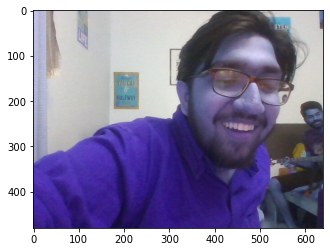

In [36]:
 plt.imshow(frame) 

In [37]:
frame.shape #480*640 pixels in 3 channels

(480, 640, 3)

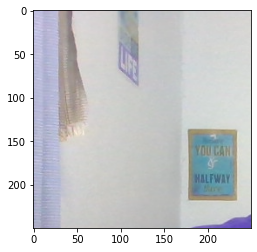

In [38]:
 plt.imshow(frame[:250,:250,:]) #to capture 250 by 250 pixels through all channels

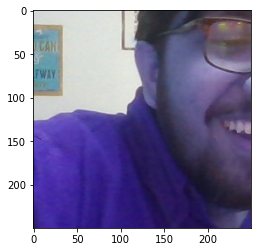

In [39]:
plt.imshow(frame[120:120+250,200:200+250,:]) #the first value where are pixels start i.e starting from 120 to 120+250 similarly on other axis

# Load and Preprocess Images

## Get Image Directories

In [7]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300) #list_files grab all the images in the directory specified with the particular file extension here .jpg
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [8]:
dir_test = anchor.as_numpy_iterator()  

In [9]:
dir_test.next()

b'C:\\Users\\Asus\\machine learning\\data\\anchor\\1cea47f0-a20e-11ec-8200-04ed33ac4940 (2022_09_23 14_42_36 UTC).jpg'

In [10]:
len(anchor)

300

In [11]:
type(anchor)

tensorflow.python.data.ops.dataset_ops.TakeDataset

## Preprocessing -Scale And Resize

In [12]:
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path) #read in image from file path
    img = tf.io.decode_jpeg(byte_img) #load in the image
    img = tf.image.resize(img , (100,100)) #resizing to 100X100X3
    img = img/255.0  #rescaling  to be between 0 and 1
    return img   #returning a numpy equivalent of the image

In [13]:
#dataset.map(preprocess) this will apply preprocess function to all the data in our dataset

In [14]:
preprocess('C:\\Users\\Asus\\machine learning\\data\\anchor\\01dab4d1-a20e-11ec-8135-04ed33ac4940 (2022_09_23 14_42_36 UTC).jpg')

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.7875    , 0.74607843, 0.70759803],
        [0.78406864, 0.74485296, 0.70367646],
        [0.77867645, 0.7409314 , 0.6931372 ],
        ...,
        [0.73357844, 0.76887256, 0.75710785],
        [0.73137254, 0.76666665, 0.75490195],
        [0.7264706 , 0.7617647 , 0.75      ]],

       [[0.8       , 0.74509805, 0.7078431 ],
        [0.79558825, 0.74607843, 0.7078431 ],
        [0.78112745, 0.74191177, 0.7022059 ],
        ...,
        [0.7286765 , 0.7639706 , 0.7522059 ],
        [0.7232843 , 0.7585784 , 0.7468137 ],
        [0.7264706 , 0.7617647 , 0.75      ]],

       [[0.7889706 , 0.7480392 , 0.6931372 ],
        [0.7879902 , 0.7509804 , 0.69730395],
        [0.7764706 , 0.74509805, 0.69558823],
        ...,
        [0.7316176 , 0.76691175, 0.75514704],
        [0.7286765 , 0.7639706 , 0.7522059 ],
        [0.7294118 , 0.7647059 , 0.7529412 ]],

       ...,

       [[0.4745098 , 0.10686275, 0.14705883],
        [0.45

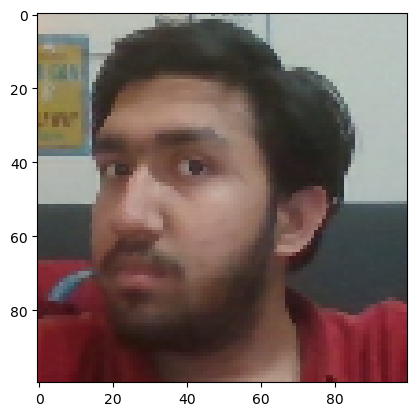

In [15]:
image = preprocess('C:\\Users\\Asus\\machine learning\\data\\anchor\\01dab4d1-a20e-11ec-8135-04ed33ac4940 (2022_09_23 14_42_36 UTC).jpg')
plt.imshow(image)

In [16]:
image.numpy().min()

0.047058824

In [17]:
image.numpy().max()

0.8041667

## creating a Labelled dataset

In [18]:
#(anchor , positive) => 1,1,1,1
#(anchor , negative) => 0,0,0,0

In [19]:
tf.ones(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [20]:
positives = tf.data.Dataset.zip((anchor,positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor))))) #zip zips stuff together to allow us to iterate all three columns together 
# the above line is basically doing this anchors + positives + ones = postively labelled dataset
negatives = tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
# the above line is basically doing this anchors + negatives + zeros = negatively labelled dataset
data = positives.concatenate(negatives)
# finally we are concatenating both the datasets to form a bigger data set

In [21]:
data

<ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [22]:
len(data)

600

In [23]:
type(data)

tensorflow.python.data.ops.dataset_ops.ConcatenateDataset

In [24]:
samples = data.as_numpy_iterator()

In [25]:
example = samples.next()

## build a train and test partition

In [26]:
def preprocess_twin(input_img , validation_img, label):
    return(preprocess(input_img),preprocess(validation_img),label)

In [27]:
res = preprocess_twin(*example) # * effectively unpacks the passed arguments

In [28]:
len(res)

3

In [29]:
res[0]

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.8039216 , 0.7490196 , 0.7372549 ],
        [0.79289216, 0.7497549 , 0.7345588 ],
        [0.7862745 , 0.74313724, 0.73382354],
        ...,
        [0.7323529 , 0.77156866, 0.7754902 ],
        [0.73014706, 0.76936275, 0.7732843 ],
        [0.7411765 , 0.78039217, 0.7882353 ]],

       [[0.7872549 , 0.7490196 , 0.71568626],
        [0.7872549 , 0.74607843, 0.72205883],
        [0.78112745, 0.7443628 , 0.71960783],
        ...,
        [0.73651963, 0.7757353 , 0.78357846],
        [0.7321078 , 0.76911765, 0.779902  ],
        [0.7294118 , 0.75980395, 0.7745098 ]],

       [[0.7852941 , 0.7492647 , 0.73039216],
        [0.7796569 , 0.7414216 , 0.73063725],
        [0.777451  , 0.7382353 , 0.73333335],
        ...,
        [0.7372549 , 0.7735294 , 0.79019606],
        [0.7321078 , 0.76617646, 0.7857843 ],
        [0.73039216, 0.7637255 , 0.78431374]],

       ...,

       [[0.43529412, 0.09362745, 0.16053921],
        [0.41

In [30]:
res[1]

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.85882354, 0.81960785, 0.7740196 ],
        [0.8509804 , 0.81960785, 0.775     ],
        [0.84632355, 0.81421566, 0.7747549 ],
        ...,
        [0.4627451 , 0.49509802, 0.47696078],
        [0.64166665, 0.65931374, 0.6544118 ],
        [0.68259805, 0.6982843 , 0.69436276]],

       [[0.8568627 , 0.8088235 , 0.7754902 ],
        [0.84166664, 0.80196077, 0.7681373 ],
        [0.8419118 , 0.80514705, 0.7764706 ],
        ...,
        [0.39436275, 0.41838235, 0.3897059 ],
        [0.54583335, 0.5654412 , 0.5477941 ],
        [0.60269606, 0.61838233, 0.61446077]],

       [[0.8473039 , 0.81397057, 0.76593137],
        [0.8372549 , 0.80563724, 0.7629902 ],
        [0.83431375, 0.80563724, 0.76593137],
        ...,
        [0.39950982, 0.41029412, 0.38897058],
        [0.48357844, 0.5009804 , 0.48406863],
        [0.56740195, 0.5830882 , 0.57916665]],

       ...,

       [[0.4492647 , 0.09240196, 0.12181372],
        [0.47

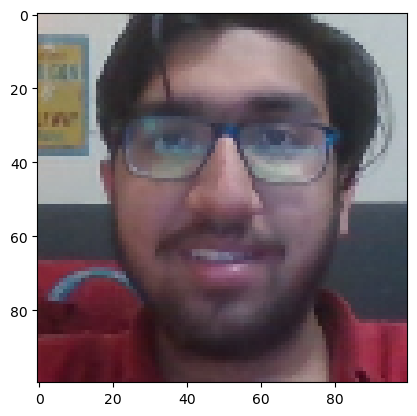

In [31]:
plt.imshow(res[0])

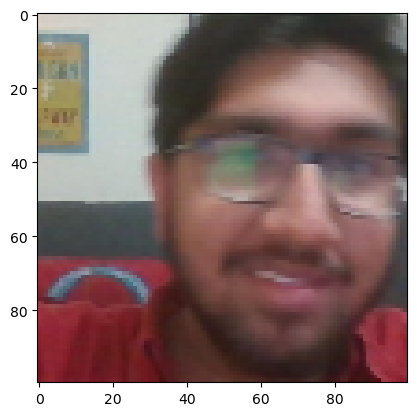

In [32]:
plt.imshow(res[1])

In [33]:
res[2]

1.0

In [34]:
# build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [35]:
data

<ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [36]:
samples = data.as_numpy_iterator()

In [37]:
len(samples.next())

3

In [38]:
samp = samples.next()

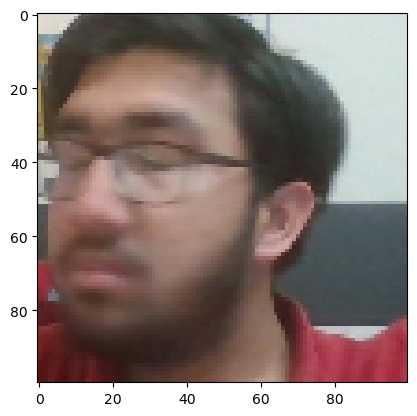

In [39]:
plt.imshow(samp[1])

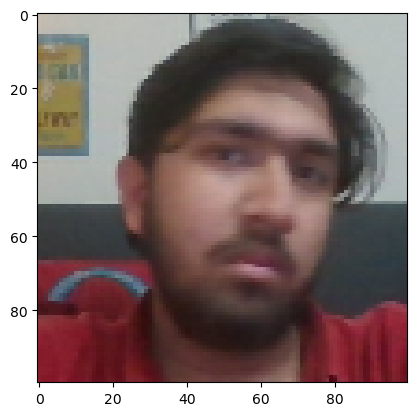

In [40]:
plt.imshow(samp[0])

In [41]:
samp[2]

1.0

In [42]:
# training partition

In [43]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8) # starts prefetching the next batch for preprocessing to counter the bottleneck problem

In [44]:
train_samples = train_data.as_numpy_iterator()

In [45]:
train_sample = train_samples.next()

In [46]:
len(train_sample[0])

16

In [47]:
len(train_sample)

3

In [48]:
# testing partition

In [49]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

## building embedding layer

In [50]:
## building an embedding layer

def make_embedding():
    inp = Input(shape=(100,100,3), name = 'input_image') #input layer
    
    #first block
    c1 = Conv2D(64, (10,10) , activation='relu')(inp) #grabbing input(inp) and passing to c1 with 64 filters of 10X10 size
    m1 = MaxPooling2D(64,(2,2),padding='same')(c1) #maxpooling layer taking c1 as input with 64 filters of 2X2 
    
    #second block
    c2 = Conv2D(128, (7,7) , activation='relu')(m1) 
    m2 = MaxPooling2D(64,(2,2),padding='same')(c2)
    
    #third block
    c3 = Conv2D(128, (4,4) , activation='relu')(m2) 
    m3 = MaxPooling2D(64,(2,2),padding='same')(c3)
    
    #fourth block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
     
    return Model(inputs=[inp],outputs=[d1] ,name='embedding')


In [61]:
embedding = make_embedding()

In [62]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

## building distance layer

In [58]:
#Siamese distance class
class L1Dist(Layer):   #passing layer class
    
    #init method - inheritence
    def __init__(self,**kwargs):   
        super().__init__()
    
    #magic happens
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding-validation_embedding)  #input_embed and valid_embed are two rivers which are joing here by findinfg the distance between them 
        

In [59]:
l1 = L1Dist()

In [60]:
#l1(anchor_embedding , validation_embedding)

## make siamese model

In [64]:
def make_siamese_model():
    
    # handle inputs
    
    #Anchor image input in the n/w
    input_image = Input(name = 'input_img',shape=(100,100,3))
    
    #validation image in the n/w
    validation_image = Input(name = 'validation_img',shape=(100,100,3))
    
    # combine siamese distance components
    siamese_layer = L1Dist()  
    siamese_layer._name = 'distance' #model summary will show this name
    distances = siamese_layer(embedding(input_image),embedding(validation_image))
    
    #classification layer
    classifier = Dense(1, activation='sigmoid')(distances)
    return Model(inputs=[input_image,validation_image],outputs=classifier,name='SiameseNetwork')

In [65]:
siamese_model =make_siamese_model()


In [66]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

## setup loss and optimizer

In [67]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [68]:
opt = tf.keras.optimizers.Adam(1e-4)

## establish checkpoints

In [69]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir,'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model = siamese_model)#saving optimizer and model

#to reload from the checkpoint we can use model.load('path_to_checkpoint'). this will load the pre trained weights into the existing model

## build train step function

In [70]:
#basic flow for training on one batch:
# 1. make a prediction
# 2. calc. loss
# 3. derive gradients
# 4. calc. new weights and apply
